In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('news.tsv',header=None,sep='\t')

In [3]:
df = df.rename(columns={0:'id',1:'category',2:'sub-category',3:'title',4:'abstract',
                        5:'url',6:'title-entities',7:'abstract-entities'})

In [4]:
df.isnull().sum()

id                      0
category                0
sub-category            0
title                   0
abstract             2666
url                     0
title-entities          3
abstract-entities       4
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df

id   category              sub-category  \
0      N55528  lifestyle           lifestyleroyals   
1      N19639     health                weightloss   
2      N61837       news                 newsworld   
3      N53526     health                    voices   
4      N38324     health                   medical   
...       ...        ...                       ...   
51275  N17258       news  newsscienceandtechnology   
51276  N23858     sports                      golf   
51277  N16909    weather         weathertopstories   
51279   N7482     sports               more_sports   
51280  N34418     sports                soccer_epl   

                                                   title  \
0      The Brands Queen Elizabeth, Prince Charles, an...   
1                          50 Worst Habits For Belly Fat   
2      The Cost of Trump's Aid Freeze in the Trenches...   
3      I Was An NBA Wife. Here's How It Affected My M...   
4      How to Get Rid of Skin Tags, According to a De...   
...                                                  ...   
51275  Realme takes chunk of India mobile market as S...   
51276  Young Northeast Florida fans flock to U.S. wom...   
51277  Adapting, Learning And Soul Searching: Reflect...   
51279  St. Dominic soccer player tries to kick cancer...   
51280                       How the Sounders won MLS Cup   

                                                abstract  \
0      Shop the notebooks, jackets, and more that the...   
1      These seemingly harmless habits are holding yo...   
2      Lt. Ivan Molchanets peeked over a parapet of s...   
3      I felt like I was a fraud, and being an NBA wi...   
4      They seem harmless, but there's a very good re...   
...                                                  ...   
51275  Over 400 percent more phones shipped year-on-year   
51276  When the U.S. women's national soccer team arr...   
51277  Woolsey Fire Anniversary: A community is forev...   
51279  Sometimes, what happens on the sidelines can b...   
51280  Mark, Jeremiah and Casey were so excited they ...   

                                                 url  \
0      https://assets.msn.com/labs/mind/AAGH0ET.html   
1      https://assets.msn.com/labs/mind/AAB19MK.html   
2      https://assets.msn.com/labs/mind/AAJgNsz.html   
3      https://assets.msn.com/labs/mind/AACk2N6.html   
4      https://assets.msn.com/labs/mind/AAAKEkt.html   
...                                              ...   
51275  https://assets.msn.com/labs/mind/BBWzDfx.html   
51276  https://assets.msn.com/labs/mind/BBWzQB8.html   
51277  https://assets.msn.com/labs/mind/BBWzQJK.html   
51279  https://assets.msn.com/labs/mind/BBWzQnK.html   
51280  https://assets.msn.com/labs/mind/BBWzQuK.html   

                                          title-entities  \
0      [{"Label": "Prince Philip, Duke of Edinburgh",...   
1      [{"Label": "Adipose tissue", "Type": "C", "Wik...   
2                                                     []   
3                                                     []   
4      [{"Label": "Skin tag", "Type": "C", "WikidataI...   
...                                                  ...   
51275  [{"Label": "Realme", "Type": "N", "WikidataId"...   
51276  [{"Label": "First Coast", "Type": "G", "Wikida...   
51277  [{"Label": "Woolsey Fire", "Type": "N", "Wikid...   
51279                                                 []   
51280  [{"Label": "MLS Cup", "Type": "U", "WikidataId...   

                                       abstract-entities  
0                                                     []  
1      [{"Label": "Adipose tissue", "Type": "C", "Wik...  
2      [{"Label": "Ukraine", "Type": "G", "WikidataId...  
3      [{"Label": "National Basketball Association", ...  
4      [{"Label": "Skin tag", "Type": "C", "WikidataI...  
...                                                  ...  
51275                                                 []  
51276  [{"Label": "United States women's national soc.

In [7]:
df_vis = df.iloc[:,:5]

In [8]:
df_vis

id   category              sub-category  \
0      N55528  lifestyle           lifestyleroyals   
1      N19639     health                weightloss   
2      N61837       news                 newsworld   
3      N53526     health                    voices   
4      N38324     health                   medical   
...       ...        ...                       ...   
51275  N17258       news  newsscienceandtechnology   
51276  N23858     sports                      golf   
51277  N16909    weather         weathertopstories   
51279   N7482     sports               more_sports   
51280  N34418     sports                soccer_epl   

                                                   title  \
0      The Brands Queen Elizabeth, Prince Charles, an...   
1                          50 Worst Habits For Belly Fat   
2      The Cost of Trump's Aid Freeze in the Trenches...   
3      I Was An NBA Wife. Here's How It Affected My M...   
4      How to Get Rid of Skin Tags, According to a De...   
...                                                  ...   
51275  Realme takes chunk of India mobile market as S...   
51276  Young Northeast Florida fans flock to U.S. wom...   
51277  Adapting, Learning And Soul Searching: Reflect...   
51279  St. Dominic soccer player tries to kick cancer...   
51280                       How the Sounders won MLS Cup   

                                                abstract  
0      Shop the notebooks, jackets, and more that the...  
1      These seemingly harmless habits are holding yo...  
2      Lt. Ivan Molchanets peeked over a parapet of s...  
3      I felt like I was a fraud, and being an NBA wi...  
4      They seem harmless, but there's a very good re...  
...                                                  ...  
51275  Over 400 percent more phones shipped year-on-year  
51276  When the U.S. women's national soccer team arr...  
51277  Woolsey Fire Anniversary: A community is forev...  
51279  Sometimes, what happens on the sidelines can b...  
51280  Mark, Jeremiah and Casey were so excited they ...  

[48612 rows x 5 columns]

In [9]:
cat=df_vis[['category','sub-category']].value_counts()

In [10]:
index=[]
for i in cat.index:
    index.append(np.array(i))
index = np.array(index)

In [11]:
datas = pd.DataFrame(columns=['category','sub-category','counts'])
datas['category'] = index[:,0]
datas['sub-category'] = index[:,1]
datas['counts'] = cat.values

In [12]:
datas

category            sub-category  counts
0       news                  newsus    6309
1     sports            football_nfl    4881
2       news            newspolitics    2760
3       news               newscrime    2120
4    weather       weathertopstories    1878
..       ...                     ...     ...
273     news                  photos       1
274     news               newsvideo       1
275     news             newstvmedia       1
276   health                strength       1
277  finance  finance-auto-insurance       1

[278 rows x 3 columns]

In [13]:
import plotly.express as pe

In [14]:
fig = pe.bar(data_frame=datas, x='category', y='counts', color='sub-category', height=500, width=900)
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [15]:
pe.bar(data_frame=datas.head(15), x='sub-category', y='counts', color='counts', height=500, width=1000)

In [16]:
df_vis['title'] = df_vis['title'].replace(r'[^A-Za-z0-9]+',' ',regex=True)
df_vis['abstract'] = df_vis['abstract'].replace(r'[^A-Za-z0-9]+',' ',regex=True)

In [17]:
df_vis['title'] = df_vis['title'].str.lower()
df_vis['abstract'] = df_vis['abstract'].str.lower()

In [18]:
# df_vis.to_csv('data.csv',index=None)

In [19]:
df_text = pd.read_csv('data_spark.csv')

In [20]:
df_text

id   category              sub-category  \
0      N55528  lifestyle           lifestyleroyals   
1      N19639     health                weightloss   
2      N61837       news                 newsworld   
3      N53526     health                    voices   
4      N38324     health                   medical   
...       ...        ...                       ...   
48607  N17258       news  newsscienceandtechnology   
48608  N23858     sports                      golf   
48609  N16909    weather         weathertopstories   
48610   N7482     sports               more_sports   
48611  N34418     sports                soccer_epl   

                                                   title  \
0      the brands queen elizabeth prince charles and ...   
1                          50 worst habits for belly fat   
2      the cost of trump s aid freeze in the trenches...   
3      i was an nba wife here s how it affected my me...   
4      how to get rid of skin tags according to a der...   
...                                                  ...   
48607  realme takes chunk of india mobile market as s...   
48608  young northeast florida fans flock to u s wome...   
48609  adapting learning and soul searching reflectin...   
48610  st dominic soccer player tries to kick cancer ...   
48611                       how the sounders won mls cup   

                                                abstract  \
0      shop the notebooks jackets and more that the r...   
1      these seemingly harmless habits are holding yo...   
2      lt ivan molchanets peeked over a parapet of sa...   
3      i felt like i was a fraud and being an nba wif...   
4      they seem harmless but there s a very good rea...   
...                                                  ...   
48607  over 400 percent more phones shipped year on year   
48608  when the u s women s national soccer team arri...   
48609  woolsey fire anniversary a community is foreve...   
48610  sometimes what happens on the sidelines can be...   
48611  mark jeremiah and casey were so excited they d...   

                             finished_no_stop_lemmatized  
0      ['brand', 'queen', 'elizabeth', 'prince', 'cha...  
1                 ['50', 'bad', 'habit', 'belly', 'fat']  
2      ['cost', 'trump', 'aid', 'freeze', 'trench', '...  
3          ['nba', 'wife', 'affect', 'mental', 'health']  
4      ['get', 'rid', 'skin', 'tag', 'accord', 'derma...  
...                                                  ...  
48607  ['realme', 'take', 'chunk', 'india', 'mobile',...  
48608  ['young', 'northeast', 'florida', 'fan', 'floc...  
48609  ['adapt', 'learn', 'soul', 'search', 'reflect'...  
48610  ['st', 'dominic', 'soccer', 'player', 'try', '...  
48611                   ['sounders', 'win', 'ml', 'cup']  

[48612 rows x 6 columns]

In [21]:
df_text = df_text.rename(columns={'finished_no_stop_lemmatized':'clean_title'})

In [22]:
df_text['clean_title'] = df_text['clean_title'].replace(r'[^A-Za-z0-9]+',' ',regex=True)

In [23]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

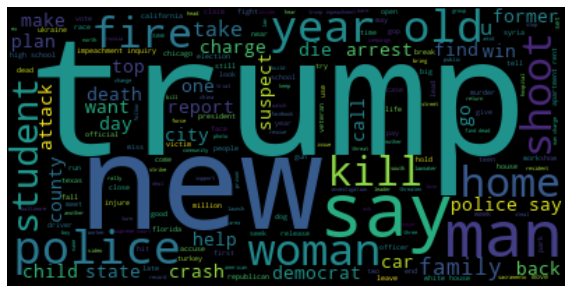

In [24]:
text=' '
for i in df_text[df_text['category']=='news']['clean_title']:
    text+=i+' '
    
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

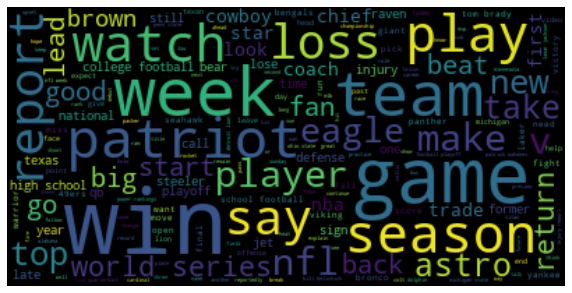

In [25]:
text=' '
for i in df_text[df_text['category']=='sports']['clean_title']:
    text+=i+' '
    
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

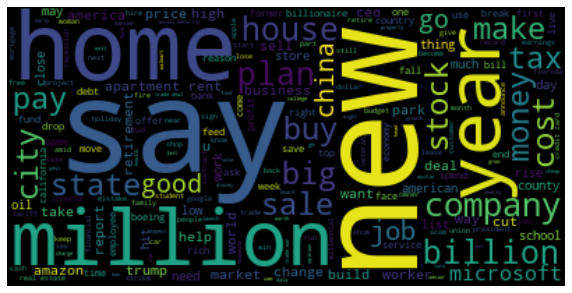

In [26]:
text=' '
for i in df_text[df_text['category']=='finance']['clean_title']:
    text+=i+' '
    
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

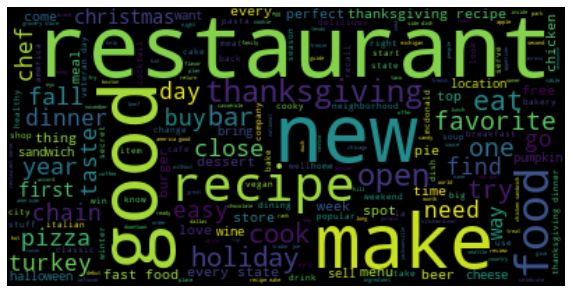

In [27]:
text=' '
for i in df_text[df_text['category']=='foodanddrink']['clean_title']:
    text+=i+' '
    
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

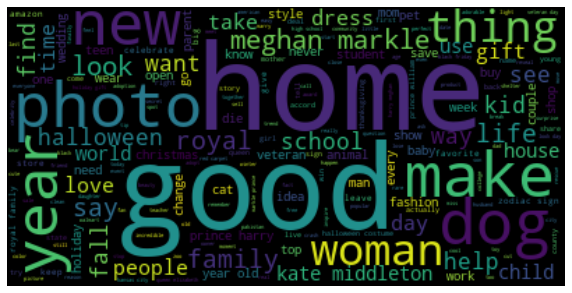

In [28]:
text=' '
for i in df_text[df_text['category']=='lifestyle']['clean_title']:
    text+=i+' '
    
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

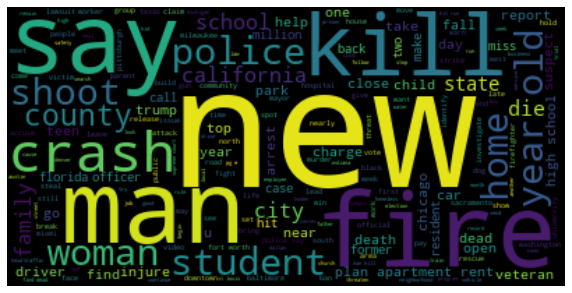

In [29]:
text=' '
for i in df_text[df_text['sub-category']=='newsus']['clean_title']:
    text+=i+' '
    
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

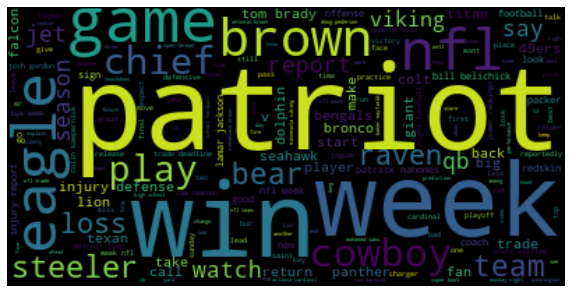

In [30]:
text=' '
for i in df_text[df_text['sub-category']=='football_nfl']['clean_title']:
    text+=i+' '
    
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

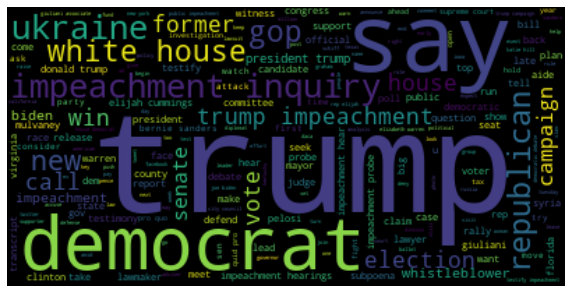

In [31]:
text=' '
for i in df_text[df_text['sub-category']=='newspolitics']['clean_title']:
    text+=i+' '
    
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

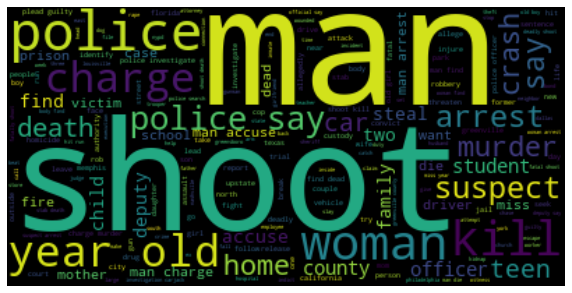

In [32]:
text=' '
for i in df_text[df_text['sub-category']=='newscrime']['clean_title']:
    text+=i+' '
    
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

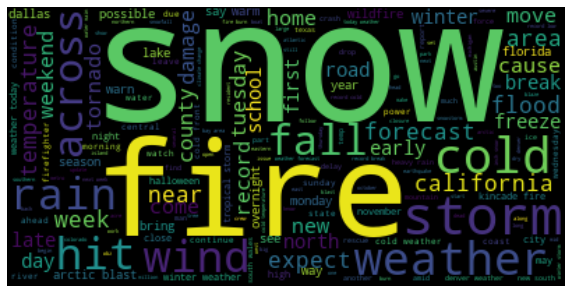

In [33]:
text=' '
for i in df_text[df_text['sub-category']=='weathertopstories']['clean_title']:
    text+=i+' '
    
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

In [34]:
cat_title = []
for i in df['title']:
    cat_title.append(len(i))
pe.histogram(cat_title, color=df['category'])

In [35]:
subcat_title = []
for i in df['title']:
    subcat_title.append(len(i))
pe.histogram(cat_title, color=df['sub-category'])

In [36]:
# df_text.to_csv('data_final.csv',index=None)